In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import  roc_auc_score
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
import os
# Import PCA from sklearn.decomposition
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

In [6]:
train_set = pd.read_csv("/kaggle/input/dataset/train_set.csv")
test_set = pd.read_csv("/kaggle/input/dataset/test_set.csv")

In [7]:

# Find missing values in the training set
missing_values = train_set.isnull().sum()
print(missing_values[missing_values > 0])

# Find missing values in the test set
missing_values = test_set.isnull().sum()
print(missing_values[missing_values > 0])

X2     2590
X3     2139
X75     456
X76     444
X77     447
X78     447
dtype: int64
X2     1085
X3      971
X75     186
X76     198
X77     195
X78     195
dtype: int64


In [9]:
categorical_cols = []
numerical_cols = []

for column in train_set.columns:
  if train_set[column].dtype == object or train_set[column].nunique() < 10:
    categorical_cols.append(column)
  else:
    numerical_cols.append(column)

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['X4', 'X5', 'X6', 'X8', 'X10', 'X11', 'X16', 'Y']
Numerical Columns: ['RecordId', 'X2', 'X3', 'X7', 'X9', 'X12', 'X13', 'X14', 'X15', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78']


In [10]:
# Handle missing values for both train and test datasets
for column in categorical_cols:
  if column in train_set.columns and train_set[column].isnull().any():
    mode_imputer = SimpleImputer(strategy='most_frequent')
    train_set[column] = mode_imputer.fit_transform(train_set[[column]])
  if column in test_set.columns and test_set[column].isnull().any():
    if column in train_set.columns:
      mode_imputer = SimpleImputer(strategy='most_frequent')
      test_set[column] = mode_imputer.fit_transform(test_set[[column]])
    else:
      print(f"Warning: Column '{column}' is missing in the training set and cannot be imputed in the test set.")

for column in numerical_cols:
  if column in train_set.columns and train_set[column].isnull().any():
    mean_imputer = SimpleImputer(strategy='mean')
    train_set[column] = mean_imputer.fit_transform(train_set[[column]])
  if column in test_set.columns and test_set[column].isnull().any():
    if column in train_set.columns:
      mean_imputer = SimpleImputer(strategy='mean')
      test_set[column] = mean_imputer.fit_transform(test_set[[column]])
    else:
      print(f"Warning: Column '{column}' is missing in the training set and cannot be imputed in the test set.")
    

In [11]:
# Find missing values in the training set
missing_values = train_set.isnull().sum()
print(missing_values[missing_values > 0])

# Find missing values in the test set
missing_values = test_set.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)
Series([], dtype: int64)


In [35]:


# Assuming train_set and test_set are pandas DataFrames
# Get all columns except 'Y' for X
X = train_set[[col for col in train_set.columns if col != 'Y']]

# Get only 'Y' column for y
y = train_set['Y']

# Select the same features for the test data
X_testdata = test_set[[col for col in test_set.columns if col != 'Y']]
if 'RecordId' in X.columns:
  X = X.drop('RecordId', axis=1)
if 'RecordId' in X_testdata.columns:
  X_testdata = X_testdata.drop('RecordId', axis=1)

# ... rest of your code (scaling, feature selection, model training, etc.) ...
X.columns

Index(['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12',
       'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22',
       'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32',
       'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42',
       'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52',
       'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62',
       'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72',
       'X73', 'X74', 'X75', 'X76', 'X77', 'X78'],
      dtype='object')

In [38]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)

In [96]:
gnb_model = GaussianNB()
sfs = SequentialFeatureSelector(gnb_model, direction='backward',n_features_to_select=20, scoring='roc_auc', n_jobs=-1)
# X = df_onehot.loc[:, df_onehot.columns != 'default payment next month']
# y = df_onehot[['default payment next month']]
sfs.fit(trainX, trainy)
print(sfs.get_feature_names_out())
features=sfs.get_feature_names_out()
features

['X2' 'X6' 'X7' 'X8' 'X15' 'X18' 'X23' 'X24' 'X26' 'X30' 'X31' 'X32' 'X36'
 'X38' 'X43' 'X45' 'X49' 'X58' 'X64' 'X68']


array(['X2', 'X6', 'X7', 'X8', 'X15', 'X18', 'X23', 'X24', 'X26', 'X30',
       'X31', 'X32', 'X36', 'X38', 'X43', 'X45', 'X49', 'X58', 'X64',
       'X68'], dtype=object)

In [36]:
gnb_model = GaussianNB()
selected_features = ['X2', 'X6', 'X7', 'X8', 'X15', 'X18', 'X23', 'X24', 'X26', 'X30',
       ]

# Keep only the selected features in X
X = X[[col for col in X.columns if col in selected_features]]

# Keep the same selected features in X_testdata
X_testdata = X_testdata[[col for col in X_testdata.columns if col in selected_features]]
X.columns

Index(['X2', 'X6', 'X7', 'X8', 'X15', 'X18', 'X23', 'X24', 'X26', 'X30'], dtype='object')

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer

# Define the model
gnb = GaussianNB()

# Define the hyperparameters to tune (var_smoothing)
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]  # Example values to try
}

# Define the scoring metric
# You can use any metric like accuracy, f1, roc_auc, etc. Here we use roc_auc
scorer = make_scorer(roc_auc_score, needs_proba=True)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, scoring=scorer, cv=5)  # 5-fold cross-validation

# Fit the grid search to the data
grid_search.fit(trainX, trainy)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC AUC Score: {grid_search.best_score_:.4f}")

# Use the best estimator
best_gnb = grid_search.best_estimator_

# Evaluate on the test data
y_probs = best_gnb.predict_proba(testX)[:, 1]
test_auc = roc_auc_score(testy, y_probs)
print(f"Test AUC Score: {test_auc:.4f}")


Best Parameters: {'var_smoothing': 1e-09}
Best ROC AUC Score: 0.8540
Test AUC Score: 0.8896


TypeError: GaussianNB.__init__() takes 1 positional argument but 2 were given

In [22]:
gnb_model.fit(trainX, trainy)

GaussianNB()

In [24]:
best_gnb.fit(trainX, trainy)

GaussianNB()

Best Parameters: {'var_smoothing': 1e-09}
Best ROC AUC Score from Grid Search: 0.8540
Test AUC Score: 0.8896
Accuracy: 0.9763


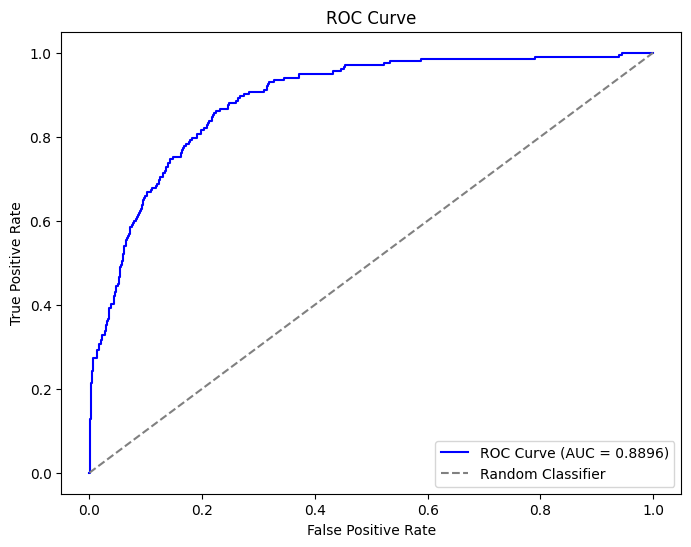

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# Define the model
gnb = GaussianNB()

# Define the hyperparameters to tune (var_smoothing)
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}

# Define the scoring metric using ROC AUC
scorer = make_scorer(roc_auc_score, needs_proba=True)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, scoring=scorer, cv=5)

# Fit the grid search to the training data
grid_search.fit(trainX, trainy)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC AUC Score from Grid Search: {grid_search.best_score_:.4f}")

# Retrieve the best model
best_gnb = grid_search.best_estimator_

# Fit the best model on the training data
best_gnb.fit(trainX, trainy)

# Use the best model to predict on the test data
y_pred = best_gnb.predict(testX)
y_probs = best_gnb.predict_proba(testX)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(testy, y_probs)

# Calculate AUC on test data
test_auc = roc_auc_score(testy, y_probs)
print(f"Test AUC Score: {test_auc:.4f}")

# Calculate accuracy as well
accuracy = accuracy_score(testy, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {test_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [41]:
import pandas as pd

# Use the best model from grid search to predict probabilities for the test set
y_test_probs = best_gnb.predict_proba(X_testdata)[:, 1]

# Create a DataFrame with RecordId and predicted probabilities
test_set['Y_probability'] = y_test_probs

# Save the DataFrame to a CSV file
output_csv_path = 'test_set_with_probabilities.csv'
test_set[['RecordId', 'Y_probability']].to_csv(output_csv_path, index=False)

# Read the generated CSV file to verify results
test_set_with_probabilities = pd.read_csv(output_csv_path)

# Get unique values in the Y_probability column
unique_y_probabilities = test_set_with_probabilities['Y_probability'].unique()

# Print the unique values and the DataFrame with predictions
print("Unique Y_probabilities:", unique_y_probabilities)
print("Predictions DataFrame:\n", test_set_with_probabilities)


Unique Y_probabilities: [4.34574144e-04 8.49610287e-01 5.68518510e-05 ... 2.31381354e-04
 2.78105373e-04 2.59576023e-03]
Predictions DataFrame:
         RecordId  Y_probability
0         300001       0.000435
1         300002       0.849610
2         300003       0.000057
3         300004       0.000299
4         300005       0.000026
...          ...            ...
105477    405478       0.000060
105478    405479       0.992989
105479    405480       0.000231
105480    405481       0.000278
105481    405482       0.002596

[105482 rows x 2 columns]


In [70]:

# Predict probabilities for the test set
y_test_probs = gnb_model.predict_proba(X_testdata)[:, 1]

# Create a DataFrame with RecordId and predicted probabilities
test_set['Y_probability'] = y_test_probs

# Save the DataFrame to a CSV file
test_set[['RecordId', 'Y_probability']].to_csv('test_set_with_probabilities.csv', index=False)


import pandas as pd

# Read the generated CSV file
csv_file_path = 'test_set_with_probabilities.csv'
test_set_with_probabilities = pd.read_csv(csv_file_path)

# Get unique values in the Y_probability column
unique_y_probabilities = test_set_with_probabilities['Y_probability'].unique()

# Print the unique values
print(unique_y_probabilities)
print(test_set_with_probabilities)


[9.60175704e-07 1.04900044e-04 1.58708412e-07 ... 2.57823015e-06
 5.01280422e-07 3.18192708e-06]
        RecordId  Y_probability
0         300001   9.601757e-07
1         300002   1.049000e-04
2         300003   1.587084e-07
3         300004   4.041097e-05
4         300005   1.129892e-05
...          ...            ...
105477    405478   1.405826e-06
105478    405479   1.000000e+00
105479    405480   2.578230e-06
105480    405481   5.012804e-07
105481    405482   3.181927e-06

[105482 rows x 2 columns]


In [37]:
scalar=MinMaxScaler()
X = scalar.fit_transform(X)
X_testdata = scalar.transform(X_testdata)




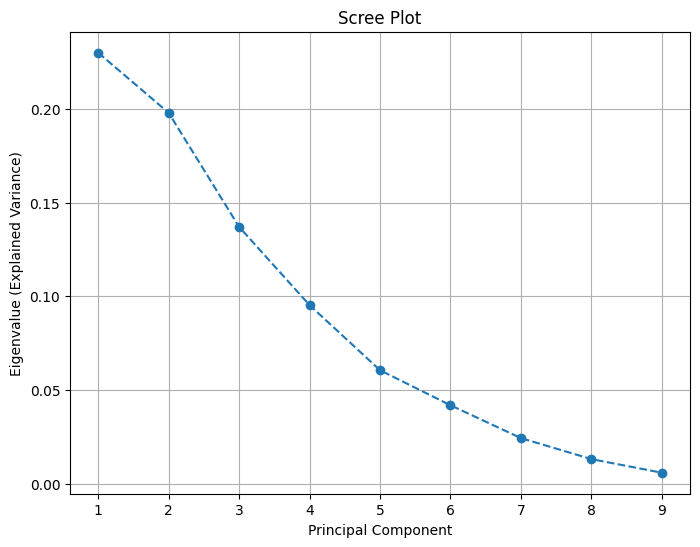

In [40]:
# Step 1: Fit PCA on the scaled training data
import matplotlib.pyplot as plt
pca = PCA().fit(X)

# Step 2: Plot the eigenvalues (variance explained by each component)
plt.figure(figsize=(8,6))
plt.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue (Explained Variance)')
plt.grid(True)
plt.show()


In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
X_testdata_pca = pca.transform(X_testdata)

# Split the PCA-transformed data into training and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=2)

In [42]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(
    n_estimators=1000,  #  number of trees
    max_depth=5,       # Limit tree depth to control overfitting
    min_samples_split=50,  # Minimum samples required to split
    min_samples_leaf=500,    # Minimum samples required at a leaf node
    max_features='sqrt',   # Randomly select a subset of features
    random_state=42,
    n_jobs=-1
)
clf.fit(X_train_pca, y_train)
# clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=500, min_samples_split=50,
                       n_estimators=1000, n_jobs=-1, random_state=42)

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

y_pred = clf.predict(X_testdata_pca)
y_probs = clf.predict_proba(X_testdata_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(ytest, y_probs)



# Calculate AUC
auc_score = roc_auc_score(y_test, y_probs)
print(f'AUC: {auc_score}')

NameError: name 'clf' is not defined

In [28]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

# Try PCA with different numbers of components
for n in [2, 3, 5, 7]:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X)

    # Train the Decision Tree with PCA-transformed data
   # clf = DecisionTreeClassifier(max_depth=5, min_samples_split=50, min_samples_leaf=5)
    scores = cross_val_score(clf, X_pca, y, cv=5, scoring='roc_auc')
    
    y_probs = clf.predict_proba(X_testdata_pca)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    # Calculate AUC
    auc_score = roc_auc_score(y_test, y_probs)
   
    print(f'Number of Components: {n}, roc_auc: {scores.mean()}')


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [44]:

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
#with k-fold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold, train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Define the classifier
clf = RandomForestClassifier(
    n_estimators=1000,  # Number of trees
    max_depth=20,        # Limit tree depth to control overfitting
    min_samples_split=10,  # Minimum samples required to split
    min_samples_leaf=2,    # Minimum samples required at a leaf node
    max_features='sqrt',   # Randomly select a subset of features
    random_state=42,
    n_jobs=-1
)

# Define K-Fold cross-validator
kfold = KFold(n_splits=30, shuffle=True, random_state=1)  # 10 folds

# Perform cross-validation on training data
cv_scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='roc_auc')

# Output cross-validation results
print(f"Cross-validation Mean accuracy: {cv_scores.mean():.4f}")
print(f"Cross-validation Standard deviation: {cv_scores.std():.4f}")

# Train the classifier on the full training set and evaluate on the test set
clf.fit(X_train, y_train)
# test_accuracy = clf.score(X_test, y_test)

# # Output test accuracy
# print(f"Test accuracy: {test_accuracy:.4f}")


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)



# Calculate AUC
auc_score = roc_auc_score(y_test, y_probs)
print(f'AUC: {auc_score}')